# How have video game sales changed over time and across platforms?

<img src='data/vidya.jpeg' width="500">
   
**Credit:**  [techcrunch](https://techcrunch.com/2015/10/31/the-history-of-gaming-an-evolving-community/)

## Introduction

**Business Context:** After several decades of growth, the prominence of the video game industry is greater than ever. The size of the investments made in the sector and the already large number of publishers make it difficult for new companies to enter the market. A software startup that was founded by a group of recent graduates in computer science wants to produce aesthetically superior video games at a very affordable price. In order to have a business plan and a marketing strategy, they need a quantitative analysis of the current market situation. 

**Analytical context:** My dataset contains the most successful games (those who sold in excess of 100,000 copies worldwide) in history. The data is stored in a file named `vgsales.csv` that was retrieved from the popular Kaggle [website](https://www.kaggle.com/gregorut/videogamesales).

These are the variables present in the dataset:

1. **Rank** Rank of the game as per overall sales (in millions of copies)
2. **Name** Name of the game
3. **Platform** Gaming platform
4. **Year** Year of publishing
5. **Genre** Genre / style of gaming experience
6. **Publisher** Name of the company that published the game
7. **NA_Sales** Total sales of the game in the North American market
8. **EU_Sales** Total sales of the game in the European market
9. **JP_Sales** Total sales of the game in the Japanese market
10. **Other_Sales** Total sales of the game everywhere else
11. **Global_Sales** Total sales of the game worldwide

All sales data are in millions of copies sold.

### Objective

- Learn how sales have changed overtime
- Learn which markets are more profitable
- Learn what are the most popular platforms 
- Learn what are the most popular genres

Let's first import our libraries:

In [1]:
import pandas as pd
import scipy.stats as stats
from pingouin import pairwise_ttests
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 1. Understanding the data

Import the data and remove the rows for which a publishing year is not available. Print a summary of the variables in the DataFrame.

In [2]:
# importing the data into df
df = pd.read_csv('data/vgsales.csv')

# removing missing data from column Year by keeping only notna values
df = df[df['Year'].notna()]

/Users/gabriellewald/.local/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/gabriellewald/.local/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
unique_genres = df['Genre'].unique()
nunique_genres = df['Genre'].nunique()
print('These are the', nunique_genres ,'most popular genres:', '\n', unique_genres)

These are the 12 most popular genres: 
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [5]:
unique_platforms = df['Platform'].unique()
nunique_platforms = df['Platform'].nunique()
print('There are', nunique_platforms, 'gaming platforms:', '\n', unique_platforms)

There are 31 gaming platforms: 
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


-------

#### 2. How have the sales changed overtime?

Create two datasets from the original - the first will include all the games published between 2010 and 2014, while the second will include the games published between 2015 and 2020. Summarize both.

In [6]:
# creating dataset containing games published between 2010 and 2014
df_1014 = df[(df['Year'] <= 2014) & (df['Year'] >= 2010)].reset_index(drop=True)

# Summary
df_1014.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,4183.0,8575.554865,4851.091433,16.00,4330.50,8706.00,12764.50,16599.00
Year,4183.0,2011.534545,1.395384,2010.00,2010.00,2011.00,2013.00,2014.00
NA_Sales,4183.0,0.235955,0.654300,0.00,0.00,0.06,0.20,14.97
EU_Sales,4183.0,0.170787,0.475358,0.00,0.00,0.03,0.14,9.27
JP_Sales,4183.0,0.060081,0.239670,0.00,0.00,0.00,0.04,5.65
Other_Sales,4183.0,0.055451,0.160936,0.00,0.00,0.01,0.05,4.14
Global_Sales,4183.0,0.522386,1.304574,0.01,0.06,0.16,0.45,21.82


In [7]:
# creating dataset containing games published between 2015 and 2020
df_1520 = df[(df['Year'] <= 2020) & (df['Year'] >= 2015)].reset_index(drop=True)

# Summary
df_1520.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,962.0,10395.575884,4932.187320,34.00,6413.00,11856.00,14620.50,16592.00
Year,962.0,2015.369023,0.510042,2015.00,2015.00,2015.00,2016.00,2020.00
NA_Sales,962.0,0.130717,0.391714,0.00,0.00,0.01,0.09,5.77
EU_Sales,962.0,0.129387,0.413216,0.00,0.00,0.02,0.09,6.06
JP_Sales,962.0,0.049345,0.161813,0.00,0.00,0.01,0.04,2.78
Other_Sales,962.0,0.039272,0.130554,0.00,0.00,0.00,0.02,2.31
Global_Sales,962.0,0.348971,0.907171,0.01,0.03,0.07,0.27,14.24


-------

#### 3. What does the distribution look like?

Here I plotted the global sales distribution for both datasets. The plots look similar, it seems the total sales in million of copies was higher for the years 2010-2014 compared to 2015-2020. But, just looking at the plots does not give us the whole story. We need to further investigate and test some hypothesis.

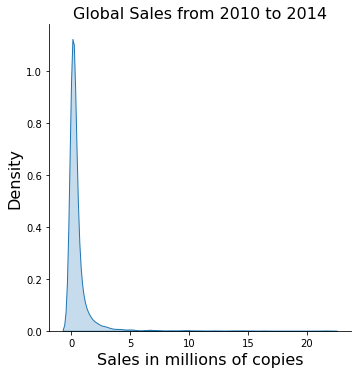

In [8]:
# plotting the distribution of global sales for df_1014
_ = sns.displot(df_1014, x='Global_Sales', kind="kde", fill=True, palette="plasma")
_ = plt.title("Global Sales from 2010 to 2014", fontsize=16)
_ = plt.xlabel('Sales in millions of copies', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

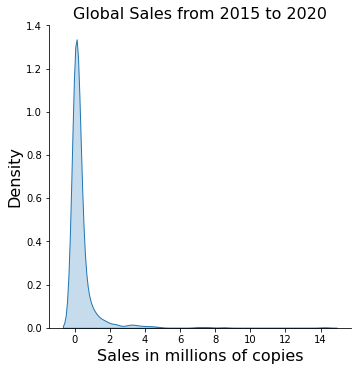

In [9]:
# plotting the distribution of global sales for df_1520
_ = sns.displot(df_1520, x='Global_Sales', kind="kde", fill=True, palette="plasma")
_ = plt.title("Global Sales from 2015 to 2020", fontsize=16)
_ = plt.xlabel('Sales in millions of copies', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

-------


#### 4. Testing hypothesis:

1. The mean level of sales in North America is significantly different for the years 2010-2014 versus 2015-2020.

**In order to validate the hypothesis I ran a t-test at a 5% significance level.**

- p-value < 0.05

There is a difference in the level of sales between the years considered. There's a statisical significant difference between the mean level of sales in North America between the years 2010-2014 and 2015-2020.

From the results below, we notice that the t-statistic is negative, which means that the average sales for games published in the last 5 years have decreased.

<!-- *A t-statistic is a random variable that is calculated from sample data and used in a hypothesis test. The t-statistic is the number we use to get to the significance or the p-value.* -->

In [10]:
# calculating the mean for NA_Sales for 2015-2020
mean_1520 = np.mean(df_1520['NA_Sales'])
mean_1520

0.13071725571725581

In [11]:
# Checking the mean for NA_Sales for 2010-2014
mean_1014 = np.mean(df_1014['NA_Sales'])
mean_1014

0.2359550561797735

In [12]:
# Passing the numpy array df_1014['NA_Sales'] into a var called sample_sales_1014
sample_sales_1520 = df_1520['NA_Sales']

# Calculating the t-test and p-value
one_sample = stats.ttest_1samp(sample_sales_1520, mean_1014)

# printing the t-test and p-value
print("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is -8.333 and the p-value is 0.000.


-------

2. The 2015-2020 mean is higher than the 2010-2014 mean across North America, Japan, Europe, and other markets 
- $\mu_{2015-2020} > \mu_{2010-2014}$

The t-statistic is negative, which means that the sales decreased not only in North America but they also descreased globally. The p-value is close to zero, which means that the average sale for games for the years of 2015 to 2020 is less than the average sales for games for the years of 2010 to 2014. The difference is statistically significant.

In [13]:
# creating variables with the numpy array for the global sales for the years of interest
global_sales_1520 = df_1520['Global_Sales']
global_sales_1014 = df_1014['Global_Sales']

# Calculating the t-test and p-value
two_sample = stats.ttest_ind(global_sales_1520, global_sales_1014, equal_var=False, alternative='less')

# printing the t-test and p-value
print("The t-statistic is %.3f and the p-value is %.3f" % two_sample)

The t-statistic is -4.881 and the p-value is 0.000


-------

#### 5. In depth investigation of latest years

The world of video games changes fast. With changes in technology, older platforms are replaced by newer and more advanced computers and consoles. Let's focus on the years 2015-2020!

#### The most popular platforms from 2015-2020 based on global sales are: 

1. PS4
2. XOne
3. 3DS
4. PS3
5. WiiU
6. X360

In [14]:
# Finding the top 6 platforms based on total global sales
top = df_1520.groupby('Platform')['Global_Sales'].sum() # adding global sales per platform

# Selecting only the top 6
top = top.sort_values(ascending=False)
top.head(6)

Platform
PS4     154.58
XOne     70.03
3DS      33.59
PS3      20.81
WiiU     19.67
X360     13.88
Name: Global_Sales, dtype: float64

In [15]:
# Creating list with top 6 platforms
top_6 = ['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'X360']

# filtering the df_1520 to contain only the platforms listed on the list
vg_data_top = df_1520[df_1520['Platform'].isin(top_6)]
vg_data_top

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
2,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
3,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
4,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
...,...,...,...,...,...,...,...,...,...,...,...
954,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
956,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
958,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
959,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


-------

#### 6. Pairwise t-test - Understanding the relationship between the top 6 platforms 

1. Conduct t-test to determine whether there is a sigificant difference in the average global sales for the two platforms at a 5\% significant threshold.

<!-- 
**Hint:** You may find the `pairwise_ttests()` method helpful. -->

There is a significant difference when the p-unc is < 0.05. Based on this metric we can see that the platforms that have a statistical significant difference in their average global sales are:

 - PS3 and WiiU
 - PS3 and XOne
 - PS3 and PS4
 - PS4 and 3DS  
 - PS4 and X360  
 - XOne and 3DS
 - XOne and X360

In [16]:
# Performing pair-wise t-test on a subset of the data
pairwise_results = pairwise_ttests(dv='Global_Sales', between = ['Platform'], padjust='none', tail='two-sided', data=vg_data_top)
pairwise_results = pairwise_results[['A', 'B', 'p-unc']]
pairwise_results = round(pairwise_results.sort_values(by=['p-unc'], ascending=False), 5)
pairwise_results



,A,B,p-unc
13,WiiU,XOne,0.95814
3,3DS,X360,0.87962
9,PS4,WiiU,0.51490
11,PS4,XOne,0.41110
0,3DS,PS3,0.18087
7,PS3,X360,0.17907
12,WiiU,X360,0.15206
2,3DS,WiiU,0.12530
6,PS3,WiiU,0.03817
14,X360,XOne,0.02340


-------

#### 7. Distribution of genre by platform

Distribution table of genres by platform plotted as a heatmap. A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. The heatmap below shows the number of games per genre for each platform for 2015-2020. 

<!-- **Hint.** To make a `pandas` DataFrame a heatmap (column-wise), run:

```python
df.style.background_gradient(cmap ='Reds', axis=0)
``` -->

In [17]:
# Creating a pivot table with Platforms as columns, Genre as "index" and count of games as values 
genre_platform = vg_data_top.pivot_table(values='Name', index='Genre', columns='Platform', fill_value=0, 
                         aggfunc=lambda x: len(x.unique()))

# Passing the pivot table to heatmap for visualization
genre_platform.style.background_gradient(cmap ='Blues', axis=0)

Platform,3DS,PS3,PS4,WiiU,X360,XOne
Genre,,,,,,
Action,55,47,89,16,17,43
Adventure,8,9,15,1,4,7
Fighting,3,6,15,1,1,5
Misc,14,8,9,8,2,5
Platform,6,0,6,5,1,2
Puzzle,4,0,1,1,0,0
Racing,0,2,12,0,2,14
Role-Playing,20,10,39,3,0,10
Shooter,0,4,24,2,4,21


- The Action genre is the most popular across all the top 6 platforms, with PS4 having the highest number of options with 89 titles, 3DS second (55 titles), and PS3 (47 titles) third.
- Role playing is the second most popular with PS4 platform leading the number of titles followed by 3DS platform.
- Sport is the third most popular with PS4 (28 titles) again leading the number of options, followed by XOne (22 titles), and PS3 (19 titles).
- PS4 platform has the highest number of games for Action, Adventure, Fighting, Racing, Role-playing, Shooter, and Sports genre.
- XOne platform is big on Action, Sports, Shooter, Racing and Role-Playng genres.
- 3DS platform is big on Action, Role-Playing, and Misc genres.
- X360 and PS3 platform are big on Action and Sports genres.
- The genres Strategy and Puzzles do not seem to be very popular among the top six platforms.

--------

#### 8. Distribution of total global sales by platform

The heatmap below shows the global sales for each platform according to genre for 2015-2020. 


In [18]:
# Creating a pivot table with Platforms as columns, Genre as "index" and global sales as values
sales_genre_platform = pd.pivot_table(vg_data_top, values='Global_Sales', index=['Genre'],
                    columns=['Platform'], aggfunc=np.sum, fill_value=0) # fill_value = 0 to deal with NaNs

# Passing the pivot table to heatmap for visualization
sales_genre_platform.style.background_gradient(cmap ='Blues', axis=0)

Platform,3DS,PS3,PS4,WiiU,X360,XOne
Genre,,,,,,
Action,17.370000,6.680000,39.920000,3.890000,3.620000,11.140000
Adventure,0.590000,1.010000,3.530000,0.010000,1.370000,2.050000
Fighting,0.410000,0.720000,7.010000,0.930000,0.270000,2.060000
Misc,2.300000,0.660000,1.780000,3.260000,0.600000,2.140000
Platform,0.660000,0.000000,1.940000,5.130000,0.090000,0.160000
Puzzle,0.670000,0.000000,0.020000,0.010000,0.000000,0.000000
Racing,0.000000,0.150000,5.330000,0.000000,0.030000,3.710000
Role-Playing,7.740000,1.230000,20.470000,1.070000,0.000000,7.710000
Shooter,0.000000,2.710000,44.400000,4.920000,2.500000,27.410000


- The Action genre is the most popular across the top six platforms. 
- The PS4 platform is the most popular platform having sold the most Shooter games (44.4 million of copies), Action games (39.9 million of copies), Sports games (29.3 million of copies), and Role-Playing games (20.47 million of copies). 
- XOne is the most popular platform for the Adventure genre (2.05 millioon of copies) and the second most popular platform for the Shooter and Sports genre with 27.4 and 13.3 million of copies respectively.
- WiiU is the most popular for Misc genre (3.26 million of copies). 
- 3DS is the most popular for Puzzle (0.67 million of copies) and Simulation (3.35 million of copies) genre.

-------

#### 9. Chi-square test - test of independence

In order to determine if there is an association between the platform and the genre of the games a chi-square test was used. 

In [19]:
# Running chi-square on the contingency table to verify association between the variables of interest
g, p, dof, expctd = chi2_contingency(genre_platform)
print("p-value of Chi-square test for Platform vs. Genre =", p)

p-value of Chi-square test for Platform vs. Genre = 2.2057083645739955e-14


The  𝑝-value is extremely small and therefore we can reject the null hypothesis and conclude that platform and the genre of games are not independent. In other words, the proportions of games per genre do not remain the same across different platforms. The results indicate that platform and genre of games are not independent. They are therefore associated, with platforms producing more or less games of specific genres as we observed in the first heatmap above.

-------